In [18]:
!git clone https://github.com/BenchengW/Hate_Speech_Detection_MMAI_894_DL
#!pip install nlpaug
#!pip install transformers
# !pip install textblob
import os
import sys
#os.chdir('Hate_Speech_Detection_MMAI_894_DL/src')

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/BenchengW/Hate_Speech_Detection_MMAI_894_DL
 * branch            HEAD       -> FETCH_HEAD
Updating 143c497..a82db17
Fast-forward
 src/Data_Augmentation_n_Sentiment_helper.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


## Albert Pretrain Model

In [19]:
from main import Albert_pretrain

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [27]:
Pretrain = Albert_pretrain()
Pretrain.load_albert()

####################################################################################################
------------------------      Albert Pretrain Model Loaded Successfully     -----------------------
####################################################################################################
Below is model summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1507000   
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 200)          160800    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 200)          240800    
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_____________________________________________________________

In [28]:
prediction = Pretrain.predict("I hate you a lot")
#Pretrain.predict(text_dataframe) or List of text
prediction

This is classified as Offensive


In [32]:
# print(prediction)
# print(prediction)

None


In [33]:
Pretrain.check_sentiment("I reallly hate this one")

####################################################################################################
#
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
#Subjective sentences generally refer to personal opinion, emotion or judgment also range of [0,1].
#
####################################################################################################

Polarity is -0.8
Subjective is 0.9


In [34]:
Pretrain.doc_augmentation("I reallly hate this one")
#Pretrain.corpus_augmentation(text_dataframe)

Original Text:
I reallly hate this one
Augmented Text:
i reallly hate second that half


## Albert Model

In [24]:
from main import Albert
Albert_model = Albert(load_data(), 50, 1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1507000   
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 200)          160800    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 200)          240800    
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
layer_normalization (LayerNo (None, 20000)             40000     
_________________________________________________________________
dense (Dense)                (None, 128)               2560128   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

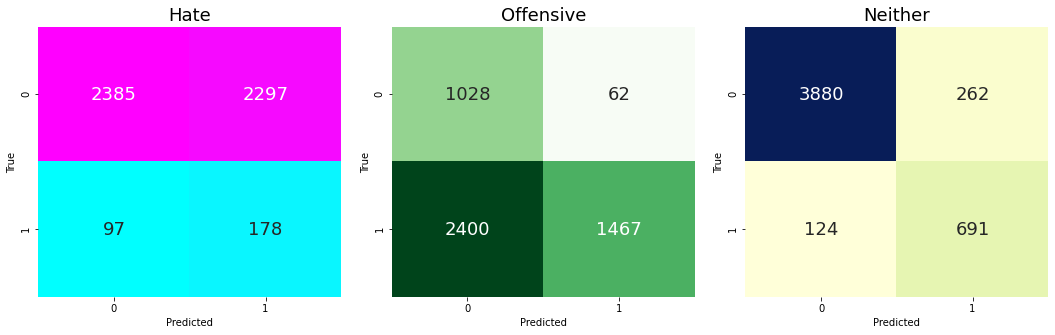

In [25]:
Albert_model.fit_albert()

In [35]:
Albert_model.predict("I hate you a lot")
#Pretrain.predict(text_dataframe) or List of text

This is classified as Hate


In [36]:
Albert_model.check_sentiment("I hate you a lot")
#Pretrain.predict(text_dataframe) or List of

####################################################################################################
#
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
#Subjective sentences generally refer to personal opinion, emotion or judgment also range of [0,1].
#
####################################################################################################

Polarity is -0.8
Subjective is 0.9
